<a href="https://colab.research.google.com/github/branndonm1/branndonm1/blob/main/machine_learning_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#import packages
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# **Section: Generating The Data**

We generate a set $D$ of $N$ (num_points_full) equally spaced data points on the interval $[-a,a]$, i.e. $D := \{(x_i,x_i^2+p): x_i=-a+\frac{2a}{N}i, p\sim N(0,1), i=1,...,N\}$. We make a scatter plot the data.


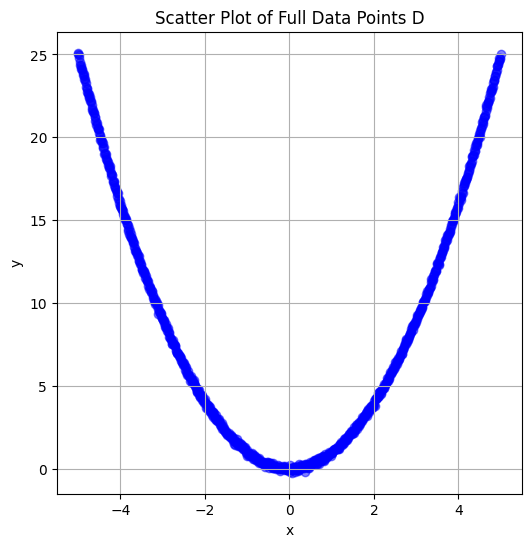

In [92]:
# Generate data points of the form (x,x^2+p) where x~linearlyspaced[-a,a], p~N(0,1)
num_points_full = 1000
endpoint_a = 5
full_x_values = np.linspace(-1*endpoint_a,endpoint_a, num_points_full)
full_p_values = 0.1*np.random.normal(0,1,num_points_full)
full_y_values = full_x_values ** 2 + full_p_values

# Plot the full data
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=.5)
plt.title('Scatter Plot of Full Data Points D')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Out of all data in $D$ we form the following sample set $S := \{(x,y)\in D: 2\leq x\leq 3\}$. We make a scatter plot of $S$.


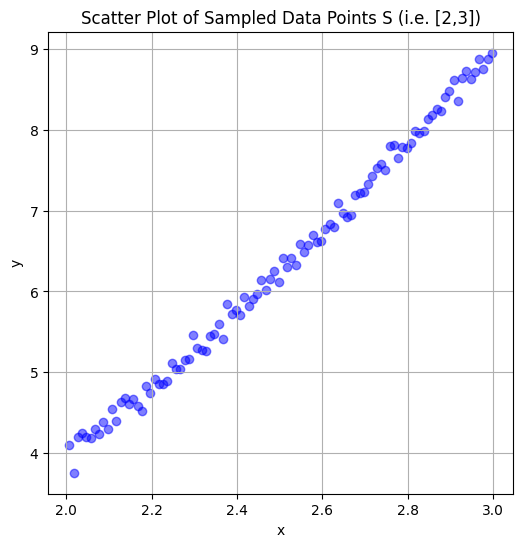

In [93]:
sample_x_values = []
sample_y_values = []

# gets sample data for x in [2,3]
for i in range(len(full_x_values)):
  if full_x_values[i] >=2 and full_x_values[i] <=3:
     sample_x_values.append(full_x_values[i])
     sample_y_values.append(full_y_values[i])

# Plot the sample data
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5)
plt.title('Scatter Plot of Sampled Data Points S (i.e. [2,3])')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# **Section: Analysis of Quadratic Model**




Our quadratic model is of the form $\hat{y}_{q}(\theta)=\theta_2x^2+\theta_1x+\theta_0$. Using the data from the sample $S$ we do linear regression to fit (i.e. to find $\hat{\theta}$ for) for the model.

In [94]:
#prep model for fitting
quad_stacked_sample_X = np.column_stack((np.square(sample_x_values), sample_x_values, np.ones_like(sample_x_values)))

# Fit the model to find theta_opt
quad_model = LinearRegression(fit_intercept=False)
quad_model.fit(quad_stacked_sample_X, sample_y_values)

# Get theta_opt
a, b, c = quad_model.coef_
quad_theta_opt=[a,b,c]

print("The optimal parameter is: theta_opt=(theta_2,theta_1,theta_0)="+str((quad_theta_opt)))

The optimal parameter is: theta_opt=(theta_2,theta_1,theta_0)=[1.0238534751250554, -0.09263485460524282, 0.06999387097820452]


Now using the optimal parameter we compute the approximating scatter plot of $\hat{y}_{q}(x,\hat{\theta})$ for all $x, \in [2,3]$.

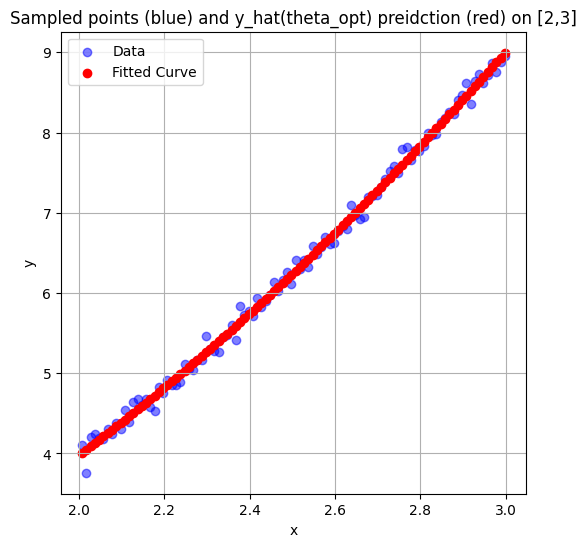

In [95]:

# Generate y values for scatter approximation of y_hat(theta_opt) on [2,3]
quad_sample_y_pred = np.dot(quad_stacked_sample_X, quad_theta_opt)

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(sample_x_values, quad_sample_y_pred, color='red', label='Fitted Curve')
plt.title('Sampled points (blue) and y_hat(theta_opt) preidction (red) on [2,3]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In order to compute the complexity we need to know the local minimums over the global set $D$. So using the optimal paramater $\hat{\theta}$ we can now compute an approximating scatter $\hat{y}_{q}(\hat{\theta},x)$ for $x\in [-a,a]$ and plot it.

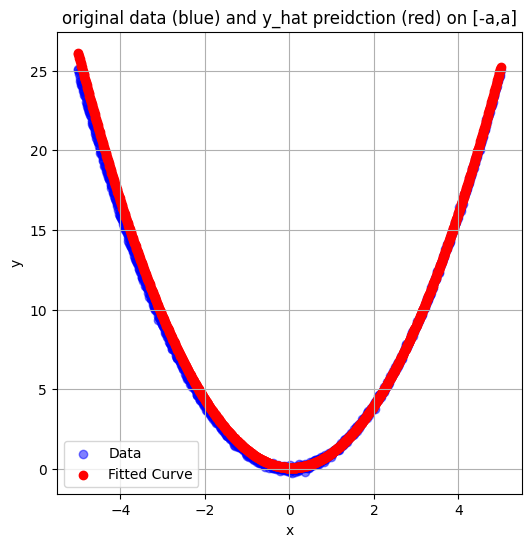

In [96]:
# Generate full points for the  y_hat(theta_opt)
quad_full_stacked_X = np.column_stack((np.square(full_x_values), full_x_values, np.ones_like(full_x_values)))
full_quad_y_pred = np.dot(quad_full_stacked_X, quad_theta_opt)

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(full_x_values, full_quad_y_pred, color='red', label='Fitted Curve')
plt.title('original data (blue) and y_hat preidction (red) on [-a,a]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

For $x_i \in [-a,a]$ we define $\hat{y}_i:=\hat{y}(\theta, x_i).$
For the metric (loss) $L(\hat{y}_i, y_i)=(\hat{y}_i - y_i)^2$ we plot the scatter below.

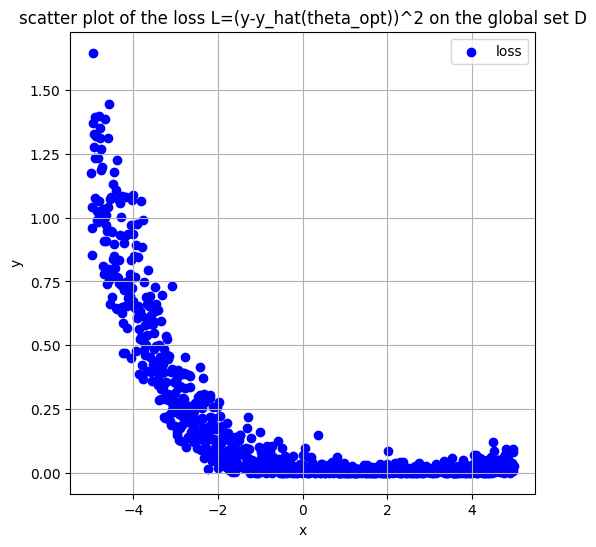

In [97]:
# Plot the global loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_y_values[i]-full_quad_y_pred[i])**2 for i in range(len(full_quad_y_pred))], color='blue', label='loss')
plt.title('scatter plot of the loss L=(y-y_hat(theta_opt))^2 on the global set D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

We will approximate minimums over the global set $D$ by findings the $x_i \in [-a,a]$ such that $L(\hat{y}_i,y_i)\leq\epsilon$. We form the minset $M:=\{x_i: L(\hat{y}_i,y_i) \leq \epsilon\}.$

In [115]:
#define loss threshold
quad_ep1 = .4
minset_counter=[]
quad_minset = []
quad_minset_values = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-full_quad_y_pred[i])**2 <= quad_ep1:
    quad_minset.append(full_x_values[i])
    quad_minset_values.append(full_y_values[i])
    minset_counter.append(i)

print(quad_minset)

[-3.858858858858859, -3.7687687687687688, -3.5785785785785786, -3.5685685685685686, -3.4384384384384385, -3.4284284284284285, -3.4184184184184185, -3.388388388388388, -3.358358358358358, -3.348348348348348, -3.328328328328328, -3.298298298298298, -3.288288288288288, -3.268268268268268, -3.258258258258258, -3.248248248248248, -3.238238238238238, -3.218218218218218, -3.188188188188188, -3.158158158158158, -3.148148148148148, -3.138138138138138, -3.128128128128128, -3.118118118118118, -3.108108108108108, -3.078078078078078, -3.068068068068068, -3.058058058058058, -3.048048048048048, -3.038038038038038, -3.028028028028028, -3.018018018018018, -3.008008008008008, -2.997997997997998, -2.987987987987988, -2.977977977977978, -2.967967967967968, -2.957957957957958, -2.947947947947948, -2.9279279279279278, -2.9179179179179178, -2.9079079079079078, -2.8978978978978978, -2.8878878878878878, -2.8778778778778777, -2.8678678678678677, -2.8578578578578577, -2.8478478478478477, -2.8378378378378377, -2.

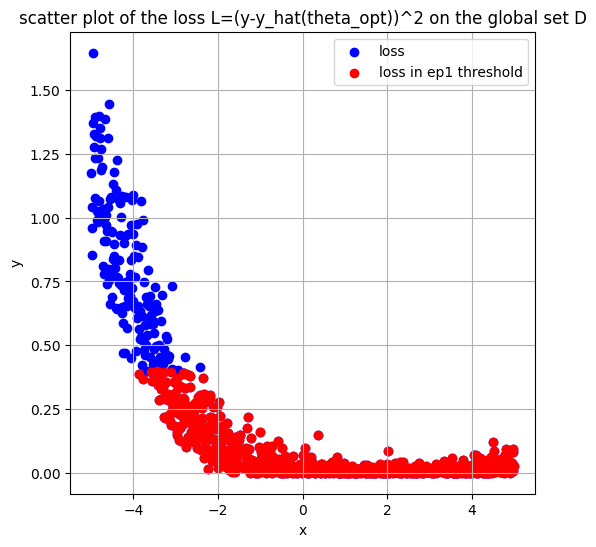

In [116]:
# Plot the global loss scatter and threshold loss
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_y_values[i]-full_quad_y_pred[i])**2 for i in range(len(full_quad_y_pred))], color='blue', label='loss')
plt.scatter(quad_minset, [(full_y_values[i]-full_quad_y_pred[i])**2 for i in minset_counter], color='red', label='loss in ep1 threshold')
plt.title('scatter plot of the loss L=(y-y_hat(theta_opt))^2 on the global set D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



Now we do a five point centered difference approximation for $\frac{\partial^2 L}{\partial x^2}(x_i)$ to approximate the second derivative at every min point $x_i \in M$. For some small $\epsilon_2$ we take $$\frac{\partial^2 L}{\partial x^2}|_{x_i}\approx\frac{-L(\hat{y}_i(\hat{\theta}, x_i-2\epsilon_2),y_i)+16L(\hat{y}_i(\hat{\theta}, x_i-\epsilon_2),y_i)-30L(\hat{y}_i(\hat{\theta}, x_i),y_i)+16L(\hat{y}_i(\hat{\theta}, x_i+\epsilon_2),y_i)-L(\hat{y}_i(\hat{\theta}, x_i+2\epsilon_2),y_i)}{12\epsilon_2^2}$$

We generate the predictions at the $\pm h$ steps then form the approximations for each member of the minset $M$.

In [117]:
h=1

# Generate points for the  y_hat(theta_opt) at x+h
quad_minset_x_plus_range = [x+h for x in quad_minset]
quad_minset_X_plus_range = np.column_stack((np.square(quad_minset_x_plus_range), quad_minset_x_plus_range, np.ones_like(quad_minset_x_plus_range)))
quad_minset_plus_quad_y_pred = np.dot(quad_minset_X_plus_range, quad_theta_opt)
quad_minset_plus_losses = [(quad_minset_plus_quad_y_pred[i]-quad_minset_values[i])**2 for i in range(len(quad_minset_plus_quad_y_pred))]

# Generate points for the  y_hat(theta_opt) at x+h
quad_minset_X_mid_range = np.column_stack((np.square(quad_minset), quad_minset, np.ones_like(quad_minset)))
quad_minset_mid_quad_y_pred = np.dot(quad_minset_X_mid_range, quad_theta_opt)
quad_minset_mid_losses = [(quad_minset_mid_quad_y_pred[i]-quad_minset_values[i])**2 for i in range(len(quad_minset_mid_quad_y_pred))]

# Generate points for the  y_hat(theta_opt) at x-h
quad_minset_x_minus_range = [x-h for x in quad_minset]
quad_minset_X_minus_range = np.column_stack((np.square(quad_minset_x_minus_range), quad_minset_x_minus_range, np.ones_like(quad_minset_x_plus_range)))
quad_minset_minus_quad_y_pred = np.dot(quad_minset_X_minus_range, quad_theta_opt)
quad_minset_minus_losses = [(quad_minset_minus_quad_y_pred[i]-quad_minset_values[i])**2 for i in range(len(quad_minset_minus_quad_y_pred))]


quad_second_deriv_at_mins=[]

for i in range(len(quad_minset)):
  quad_second_deriv_at_mins.append((quad_minset_minus_losses[i]-2*quad_minset_mid_losses[i]+ quad_minset_plus_losses[i])/(h ** 2))

print("The second derivatives are"+str(quad_second_deriv_at_mins))

The second derivatives are[132.4711640139934, 126.56432422184069, 114.80135732204153, 114.07442430704943, 106.45624425728263, 105.69593591117605, 105.19206360717766, 103.15195245316711, 101.58981219857075, 100.87102782371092, 100.10566990483255, 98.22184076159951, 97.19890061255921, 96.74005591768372, 95.8210625135061, 94.96189234797805, 94.94842871902253, 93.66685983106186, 92.04265791126055, 90.10728295353975, 89.80498919102673, 88.92655546452916, 88.72193985193132, 87.78548564747479, 88.05429303461152, 85.93712528561957, 85.48646364388755, 84.94599743150032, 84.33766853370076, 84.26544413796725, 83.05732245768942, 83.08015454217768, 82.44851685694823, 82.1917463572706, 81.2741750763395, 81.2437315285973, 79.87364159722569, 79.30385993855064, 79.58526866034771, 77.70297636379232, 77.69535380261011, 77.27714839443401, 76.46138550125612, 76.63584045587356, 75.19823271173709, 75.35078680058666, 74.70937814765868, 74.0548292678926, 74.34658083586685, 73.88339011106223, 73.0512535752184, 

In [43]:
h2=h/3

l_quad_minset_x_plus_range = [x+h-h2 for x in quad_minset]
l_quad_minset_X_plus_range = np.column_stack((np.square(l_quad_minset_x_plus_range), l_quad_minset_x_plus_range, np.ones_like(l_quad_minset_x_plus_range)))
l_quad_minset_plus_quad_y_pred = np.dot(l_quad_minset_X_plus_range, quad_theta_opt)
r_quad_minset_x_plus_range = [x+h+h2 for x in quad_minset]
r_quad_minset_X_plus_range = np.column_stack((np.square(r_quad_minset_x_plus_range), r_quad_minset_x_plus_range, np.ones_like(r_quad_minset_x_plus_range)))
r_quad_minset_plus_quad_y_pred = np.dot(r_quad_minset_X_plus_range, quad_theta_opt)
avg_plus=[(l_quad_minset_plus_quad_y_pred[i]+quad_minset_plus_quad_y_pred[i]+r_quad_minset_plus_quad_y_pred[i])/len(quad_minset) for i in range(len(quad_minset))]


l_quad_minset_x_mid_range = [x-h2 for x in quad_minset]
l_quad_minset_X_mid_range = np.column_stack((np.square(l_quad_minset_x_mid_range), l_quad_minset_x_mid_range, np.ones_like(l_quad_minset_x_mid_range)))
l_quad_minset_mid_quad_y_pred = np.dot(l_quad_minset_X_mid_range, quad_theta_opt)
r_quad_minset_x_mid_range = [x+h2 for x in quad_minset]
r_quad_minset_X_mid_range = np.column_stack((np.square(r_quad_minset_x_mid_range), r_quad_minset_x_mid_range, np.ones_like(r_quad_minset_x_mid_range)))
r_quad_minset_mid_quad_y_pred = np.dot(r_quad_minset_X_mid_range, quad_theta_opt)
avg_plus=[(l_quad_minset_mid_quad_y_pred[i]+quad_minset_mid_quad_y_pred[i]+r_quad_minset_mid_quad_y_pred[i])/len(quad_minset) for i in range(len(quad_minset))]


l_quad_minset_x_plus_range = [x+h-h2 for x in quad_minset]
l_quad_minset_X_plus_range = np.column_stack((np.square(l_quad_minset_x_plus_range), l_quad_minset_x_plus_range, np.ones_like(l_quad_minset_x_plus_range)))
l_quad_minset_plus_quad_y_pred = np.dot(l_quad_minset_X_plus_range, quad_theta_opt)
r_quad_minset_x_plus_range = [x+h+h2 for x in quad_minset]
r_quad_minset_X_plus_range = np.column_stack((np.square(r_quad_minset_x_plus_range), r_quad_minset_x_plus_range, np.ones_like(r_quad_minset_x_plus_range)))
r_quad_minset_plus_quad_y_pred = np.dot(r_quad_minset_X_plus_range, quad_theta_opt)
avg_plus=[(l_quad_minset_plus_quad_y_pred[i]+quad_minset_plus_quad_y_pred[i]+r_quad_minset_plus_quad_y_pred[i])/len(quad_minset) for i in range(len(quad_minset))]


We finally compute the complexity $$C(\hat{\theta}) = -.5\log(\sum_{x_m \in M} |\frac{\partial^2 L}{\partial x^2}(x_m)|).$$

In [118]:
quad_complexity = -.5*math.log(sum([abs(x) for x in quad_second_deriv_at_mins]))
print("The complexity of the quad is: "+str(quad_complexity))

The complexity of the quad is: -5.379515857442116


# **Section: Analysis of Trigonometric Model**




Our trigonometric model is of the form $\hat{y}_{t}(\theta)=\theta_2\cos(x)+\theta_1\sin(x)+\theta_0$. Using the data from the sample $S$ we do linear regression to fit (i.e. to find $\hat{\theta}$ for) for the model.

In [104]:
#prep data for fitting
trig_stacked_sample_X = np.column_stack((np.sin(sample_x_values), np.cos(sample_x_values), np.ones_like(sample_x_values)))

# Fit the model to find theta_opt
trig_model = LinearRegression(fit_intercept=False)
trig_model.fit(trig_stacked_sample_X, sample_y_values)

# Get theta_opt
a, b, c = trig_model.coef_
trig_theta_opt=[a,b,c]


# Generate points for the  y_hat(theta_opt)
trig_y_pred = np.dot(trig_stacked_sample_X, trig_theta_opt)

print("theta_opt=(theta_2,theta_1,theta_0)="+str(trig_theta_opt))

theta_opt=(theta_2,theta_1,theta_0)=[-5.385128572795135, -1.403551180335775, 8.335080903609123]


Now using the optimal parameter we compute the approximating scatter plot of $\hat{y}_{t}(x,\hat{\theta})$ for all $x, \in [2,3]$.

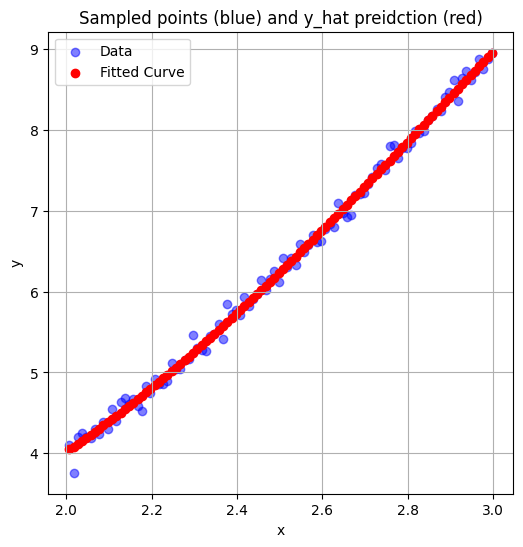

In [105]:
# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(sample_x_values, trig_y_pred, color='red', label='Fitted Curve')
plt.title('Sampled points (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In order to compute the complexity we need to know the local minimums over the global set $D$. So using the optimal paramater $\hat{\theta}$ we can now compute an approximating scatter $\hat{y}_{q}(\hat{\theta},x)$ for $x\in [-a,a]$ and plot it.

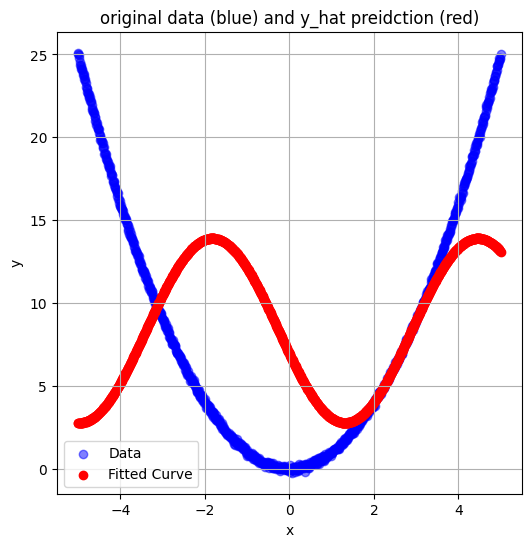

In [106]:
# Generate full points for the  y_hat(theta_opt)
full_trig_stacked_X = np.column_stack((np.sin(full_x_values), np.cos(full_x_values), np.ones_like(full_x_values)))
full_trig_y_pred = np.dot(full_trig_stacked_X, trig_theta_opt)

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(full_x_values, full_trig_y_pred, color='red', label='Fitted Curve')
plt.title('original data (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

For $x_i \in [-a,a]$ we define $\hat{y}_i:=\hat{y}(\theta, x_i).$
For the metric (loss) $L(\hat{y}_i, y_i)=(\hat{y}_i - y_i)^2$ we plot the scatter below.

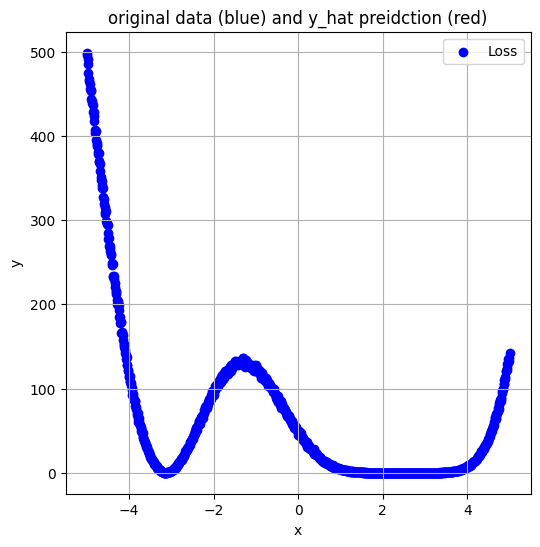

In [107]:
# Generate full points for the  y_hat(theta_opt)
full_trig_stacked_X = np.column_stack((np.sin(full_x_values), np.cos(full_x_values), np.ones_like(full_x_values)))
full_trig_y_pred = np.dot(full_trig_stacked_X, trig_theta_opt)

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_trig_y_pred[i]-full_y_values[i])**2 for i in range(len(full_y_values))], color='blue', label='Loss')
plt.title('original data (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



We will approximate minimums over the global set $D$ by findings the $x_i \in [-a,a]$ such that $L(\hat{y}_i,y_i)\leq\epsilon$. We form the minset $M:=\{x_i: L(\hat{y}_i,y_i) \leq \epsilon\}.$

In [110]:
#define loss threshold
ep = .4
trig_minset = []
trig_minset_values = []
trig_minset_counter = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-full_trig_y_pred[i])**2 <= ep:
    trig_minset.append(full_x_values[i])
    trig_minset_values.append(full_y_values[i])
    trig_minset_counter.append(i)

print(trig_minset)

[-3.178178178178178, -3.168168168168168, -3.158158158158158, -3.148148148148148, -3.138138138138138, -3.128128128128128, -3.118118118118118, -3.108108108108108, -3.088088088088088, -3.078078078078078, 1.4464464464464468, 1.4564564564564568, 1.4864864864864868, 1.5065065065065069, 1.5265265265265269, 1.5365365365365369, 1.5465465465465469, 1.556556556556557, 1.566566566566567, 1.576576576576577, 1.586586586586587, 1.596596596596597, 1.606606606606607, 1.616616616616617, 1.626626626626627, 1.636636636636637, 1.646646646646647, 1.656656656656657, 1.666666666666667, 1.676676676676677, 1.686686686686687, 1.696696696696697, 1.706706706706707, 1.716716716716717, 1.726726726726727, 1.736736736736737, 1.746746746746747, 1.756756756756757, 1.766766766766767, 1.776776776776777, 1.786786786786787, 1.796796796796797, 1.806806806806807, 1.816816816816817, 1.826826826826827, 1.836836836836837, 1.846846846846847, 1.856856856856857, 1.866866866866867, 1.876876876876877, 1.886886886886887, 1.89689689689

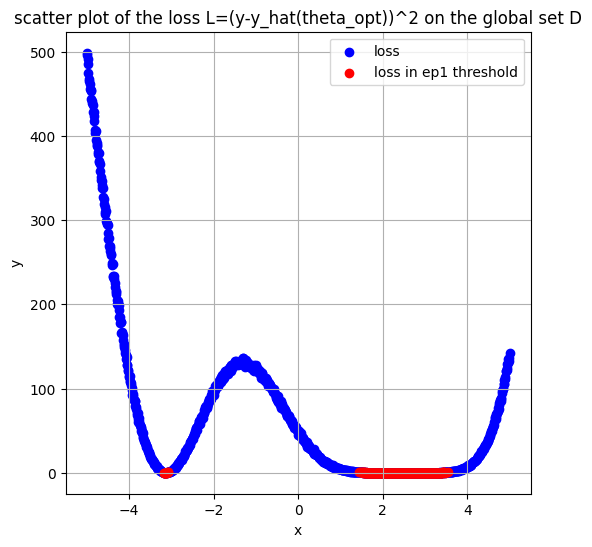

In [111]:
# Plot the global loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_y_values[i]-full_trig_y_pred[i])**2 for i in range(len(full_quad_y_pred))], color='blue', label='loss')
plt.scatter(trig_minset, [(full_y_values[i]-full_trig_y_pred[i])**2 for i in trig_minset_counter], color='red', label='loss in ep1 threshold')
plt.title('scatter plot of the loss L=(y-y_hat(theta_opt))^2 on the global set D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Now we do a centered difference approximation for $\frac{\partial^2 L}{\partial x^2}(x_m)$ to approximate the second derivative at every min point $x_m \in M$. For some small $h$ we take $$\frac{\partial^2 L}{\partial x^2}|_{x_i}\approx\frac{L(\hat{y}_i(\hat{\theta}, x_i-h),y_i)-2L(\hat{y}_i(\hat{\theta}, x_i),y_i)+L(\hat{y}_i(\hat{\theta}, x_i+h),y_i)}{h^2}$$

We generate the predictions at the h steps first below.

In [112]:
h=1

# Generate points for the  y_hat(theta_opt) at x+h
trig_minset_x_plus_range = [x+h for x in trig_minset]
trig_minset_X_plus_range = np.column_stack((np.sin(trig_minset_x_plus_range), np.cos(trig_minset_x_plus_range), np.ones_like(trig_minset_x_plus_range)))
trig_minset_plus_trig_y_pred = np.dot(trig_minset_X_plus_range, trig_theta_opt)
trig_minset_plus_losses = [(trig_minset_plus_trig_y_pred[i]-trig_minset_values[i])**2 for i in range(len(trig_minset_plus_trig_y_pred))]


# Generate points for the  y_hat(theta_opt) at x+h
trig_minset_X_mid_range = np.column_stack((np.sin(trig_minset), np.cos(trig_minset), np.ones_like(trig_minset)))
trig_minset_mid_trig_y_pred = np.dot(trig_minset_X_mid_range, trig_theta_opt)
trig_minset_mid_losses = [(trig_minset_mid_trig_y_pred[i]-trig_minset_values[i])**2 for i in range(len(trig_minset_mid_trig_y_pred))]


# Generate points for the  y_hat(theta_opt) at x-h
trig_minset_x_minus_range = [x-h for x in trig_minset]
trig_minset_X_minus_range = np.column_stack((np.sin(trig_minset_x_minus_range), np.cos(trig_minset_x_minus_range), np.ones_like(trig_minset_x_plus_range)))
trig_minset_minus_trig_y_pred = np.dot(trig_minset_X_minus_range, trig_theta_opt)
trig_minset_minus_losses = [(trig_minset_minus_trig_y_pred[i]-trig_minset_values[i])**2 for i in range(len(trig_minset_minus_trig_y_pred))]


print(trig_minset_x_minus_range)
print(trig_minset_minus_trig_y_pred)

[-4.178178178178178, -4.168168168168168, -4.158158158158158, -4.148148148148148, -4.138138138138138, -4.128128128128128, -4.118118118118118, -4.108108108108108, -4.088088088088088, -4.078078078078078, 0.4464464464464468, 0.4564564564564568, 0.48648648648648685, 0.5065065065065069, 0.5265265265265269, 0.5365365365365369, 0.5465465465465469, 0.5565565565565569, 0.5665665665665669, 0.5765765765765769, 0.5865865865865869, 0.5965965965965969, 0.6066066066066069, 0.6166166166166169, 0.6266266266266269, 0.6366366366366369, 0.646646646646647, 0.656656656656657, 0.666666666666667, 0.676676676676677, 0.686686686686687, 0.696696696696697, 0.706706706706707, 0.716716716716717, 0.726726726726727, 0.736736736736737, 0.746746746746747, 0.756756756756757, 0.766766766766767, 0.776776776776777, 0.786786786786787, 0.796796796796797, 0.806806806806807, 0.8168168168168171, 0.8268268268268271, 0.8368368368368371, 0.8468468468468471, 0.8568568568568571, 0.8668668668668671, 0.8768768768768771, 0.8868868868868

We compute the derivatives $\frac{\partial^2 L}{\partial x^2}(x_m)$ below.

In [113]:
trig_second_deriv_at_mins=[]

for i in range(len(trig_minset)):
  trig_second_deriv_at_mins.append((trig_minset_plus_losses[i]-2*trig_minset_mid_losses[i]+ trig_minset_minus_losses[i])/(h ** 2))

print(trig_second_deriv_at_mins)

[43.517665751283054, 43.13183090789439, 43.22466383699999, 42.68001116620091, 42.46458521620312, 41.79224178612239, 41.579971862326566, 40.50413580188807, 39.33989267066566, 39.18062085884439, 19.939703948635, 19.21548483307621, 19.94640948716095, 20.171526242177894, 20.243331036403244, 18.376170028445948, 20.52300426873277, 20.903338815773104, 19.286783515169404, 19.753697267722092, 18.567959303802514, 21.27798470208316, 18.85842338706504, 19.884274678927703, 20.109905050075383, 19.095510852550298, 18.596234008187768, 21.321103107878653, 20.333740021650897, 21.329006298898268, 19.697985609217458, 20.267720078070425, 20.362420795516112, 19.810906256116624, 19.192778944819125, 20.185595543272214, 20.817049473147783, 19.99353798998308, 20.422278082540924, 20.005714785341553, 20.971480043639794, 21.697455557364403, 20.7049049715529, 21.20782183727567, 22.02203290802868, 23.712208806009524, 21.363376256658515, 21.380500015314595, 21.23202472568783, 23.71141428126542, 22.89366295501315, 23.

We finally compute the complexity $$C(\hat{\theta}) = -.5\log(\sum_{x_m \in M} |\frac{\partial^2 L}{\partial x^2}(x_m)|).$$

In [114]:
trig_complexity = -.5*math.log(sum([abs(x) for x in trig_second_deriv_at_mins]))
print(trig_complexity)

-4.439551574580945


# **Section: Analysis of Linear Model**

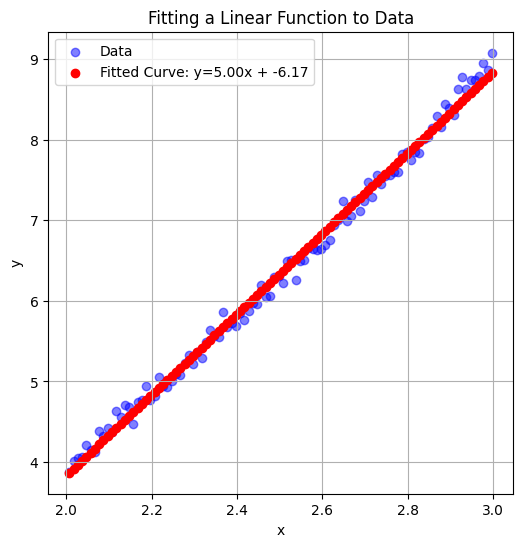

In [69]:
#prep data for fitting
linear_stacked_sample_X = np.column_stack((sample_x_values, np.ones_like(sample_x_values)))

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(linear_stacked_sample_X, sample_y_values)

# Get theta_opt
a = model.coef_[0]
b = model.intercept_

# Generate predicted y_hat(theta_opt)
x_range = [x for x in sample_x_values]
y_linear_pred = [a * x + b for x in x_range]

# Plot the fitted curve
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(x_range, y_linear_pred, color='red', label=f'Fitted Curve: y={a:.2f}x + {b:.2f}')
plt.title('Fitting a Linear Function to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


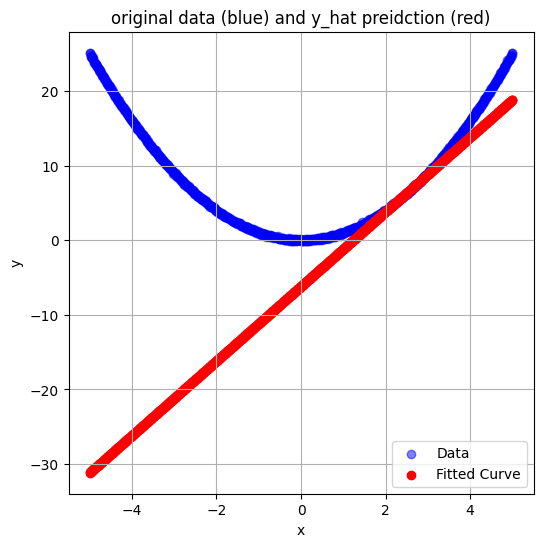

In [70]:
# Generate full points for the  y_hat(theta_opt)
full_linear_y_pred = [a*x+b for x in full_x_values]

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(full_x_values, full_linear_y_pred, color='red', label='Fitted Curve')
plt.title('original data (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
#define loss threshold
ep = .4
linear_minset = []
linear_minset_counter = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-full_linear_y_pred[i])**2 <= ep:
    linear_minset.append(full_x_values[i])
    linear_minset_counter.append(i)

print(linear_minset)

[1.596596596596597, 1.656656656656657, 1.666666666666667, 1.676676676676677, 1.686686686686687, 1.696696696696697, 1.706706706706707, 1.716716716716717, 1.736736736736737, 1.746746746746747, 1.756756756756757, 1.766766766766767, 1.776776776776777, 1.786786786786787, 1.796796796796797, 1.806806806806807, 1.816816816816817, 1.826826826826827, 1.836836836836837, 1.846846846846847, 1.856856856856857, 1.866866866866867, 1.876876876876877, 1.886886886886887, 1.8968968968968971, 1.9069069069069071, 1.9169169169169171, 1.9269269269269271, 1.9369369369369371, 1.9469469469469471, 1.9569569569569571, 1.9669669669669672, 1.9769769769769772, 1.9869869869869872, 1.9969969969969972, 2.007007007007007, 2.017017017017017, 2.027027027027027, 2.037037037037037, 2.047047047047047, 2.057057057057057, 2.067067067067067, 2.0770770770770772, 2.0870870870870872, 2.0970970970970972, 2.1071071071071072, 2.1171171171171173, 2.1271271271271273, 2.1371371371371373, 2.1471471471471473, 2.1571571571571573, 2.16716716

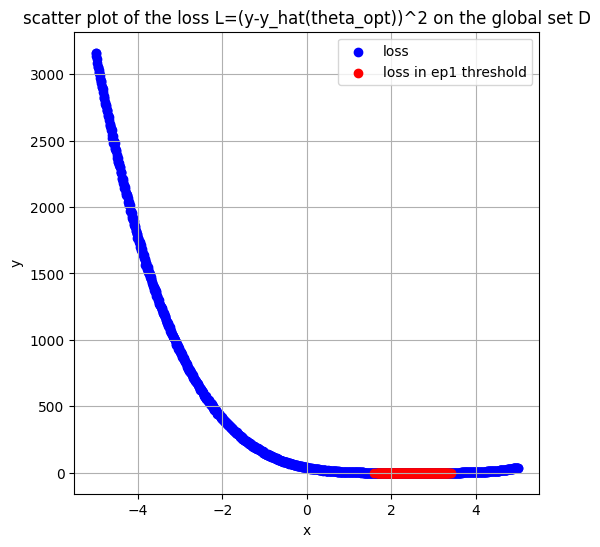

In [125]:
# Plot the global loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_y_values[i]-full_linear_y_pred[i])**2 for i in range(len(full_quad_y_pred))], color='blue', label='loss')
plt.scatter(linear_minset, [(full_y_values[i]-full_linear_y_pred[i])**2 for i in linear_minset_counter], color='red', label='loss in ep1 threshold')
plt.title('scatter plot of the loss L=(y-y_hat(theta_opt))^2 on the global set D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
#plt.xlim((2, 3))
#plt.ylim((0, .1))
plt.show()


In [122]:
h=1

# Generate points for the  y_hat(theta_opt) at x+h
minset_x_plus_range = [x+h for x in linear_minset]
minset_plus_linear_y_pred = [a*x+b for x in minset_x_plus_range]

# Generate points for the  y_hat(theta_opt) at x+h
minset_mid_linear_y_pred = [a*x+b for x in linear_minset]

# Generate points for the  y_hat(theta_opt) at x-h
minset_x_minus_range = [x-h for x in linear_minset]
minset_minus_linear_y_pred = [a*x+b for x in minset_x_minus_range]

print(minset_x_minus_range)
print(minset_minus_linear_y_pred)

[0.5965965965965969, 0.656656656656657, 0.666666666666667, 0.676676676676677, 0.686686686686687, 0.696696696696697, 0.706706706706707, 0.716716716716717, 0.736736736736737, 0.746746746746747, 0.756756756756757, 0.766766766766767, 0.776776776776777, 0.786786786786787, 0.796796796796797, 0.806806806806807, 0.8168168168168171, 0.8268268268268271, 0.8368368368368371, 0.8468468468468471, 0.8568568568568571, 0.8668668668668671, 0.8768768768768771, 0.8868868868868871, 0.8968968968968971, 0.9069069069069071, 0.9169169169169171, 0.9269269269269271, 0.9369369369369371, 0.9469469469469471, 0.9569569569569571, 0.9669669669669672, 0.9769769769769772, 0.9869869869869872, 0.9969969969969972, 1.0070070070070072, 1.0170170170170172, 1.0270270270270272, 1.0370370370370372, 1.0470470470470472, 1.0570570570570572, 1.0670670670670672, 1.0770770770770772, 1.0870870870870872, 1.0970970970970972, 1.1071071071071072, 1.1171171171171173, 1.1271271271271273, 1.1371371371371373, 1.1471471471471473, 1.157157157157

In [123]:
second_deriv_at_mins=[]

for i in range(len(linear_minset)):
  second_deriv_at_mins.append((minset_minus_linear_y_pred[i]-2*minset_mid_linear_y_pred[i]+ minset_plus_linear_y_pred[i])/(h ** 2))

print(second_deriv_at_mins)

[1.7763568394002505e-15, -1.7763568394002505e-15, 0.0, 0.0, 1.7763568394002505e-15, 1.7763568394002505e-15, 1.7763568394002505e-15, 0.0, -3.552713678800501e-15, -3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, -3.552713678800501e-15, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 3.552713678800501e-15, -3.552713678800501e-15, -3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, -3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, -3.552713678800501e-15, 0.0, 0.0, 0.0, -3.552713678800501e-15, 3.552713678800501e-15, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0

In [124]:
complexity = -.5*math.log(sum([abs(x) for x in second_deriv_at_mins]))
print(complexity)

14.56794905506751


# **Section: Analysis of Constant Model**

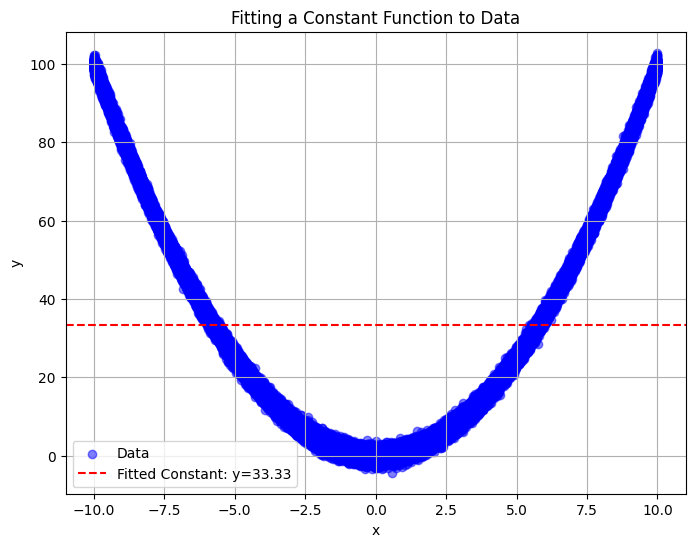

In [ ]:
# Take y_hat(theta_opt) = average over y's
constant_value = np.mean(full_y_values)

# Plot the fitted constant line
plt.figure(figsize=(8, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.axhline(y=constant_value, color='red', linestyle='--', label=f'Fitted Constant: y={constant_value:.2f}')
plt.title('Fitting a Constant Function to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#define loss threshold
ep = 10
const_minset = []
const_minset_counter = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-constant_value)**2 <= ep:
    const_minset.append(full_x_values[i])
    const_minset_counter.append(i)

print(const_minset)

[-6.3125631256312555, -6.266762667626676, -6.243762437624376, -6.238762387623876, -6.2207622076220765, -6.217362173621736, -6.211162111621116, -6.2065620656206555, -6.193361933619336, -6.192961929619296, -6.191561915619156, -6.181961819618196, -6.178361783617836, -6.174561745617456, -6.171161711617116, -6.165961659616595, -6.157361573615736, -6.157161571615716, -6.152361523615236, -6.151761517615176, -6.149561495614956, -6.148961489614896, -6.148761487614876, -6.147961479614796, -6.146761467614676, -6.144561445614456, -6.143361433614336, -6.143161431614316, -6.142961429614296, -6.139961399613997, -6.139361393613935, -6.138961389613896, -6.137561375613756, -6.135361353613536, -6.1343613436134365, -6.133761337613375, -6.132161321613216, -6.131961319613196, -6.130561305613056, -6.128961289612896, -6.1285612856128555, -6.125361253612536, -6.122761227612276, -6.121161211612116, -6.1203612036120365, -6.119161191611916, -6.116361163611636, -6.1117611176111755, -6.111161111611116, -6.110761107

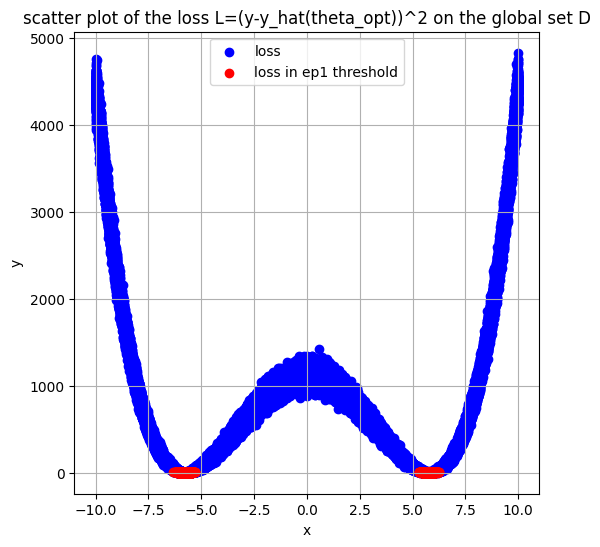

In [ ]:
# Plot the global loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, [(full_y_values[i]-constant_value)**2 for i in range(len(full_y_values))], color='blue', label='loss')
plt.scatter(const_minset, [(full_y_values[i]-constant_value)**2 for i in const_minset_counter], color='red', label='loss in ep1 threshold')
plt.title('scatter plot of the loss L=(y-y_hat(theta_opt))^2 on the global set D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
h=1

# Generate points for the  y_hat(theta_opt) at x+h
minset_x_plus_range = [x+h for x in const_minset]
minset_plus_linear_y_pred = [a*x+b for x in minset_x_plus_range]

# Generate points for the  y_hat(theta_opt) at x+h
minset_mid_linear_y_pred = [a*x+b for x in linear_minset]

# Generate points for the  y_hat(theta_opt) at x-h
minset_x_minus_range = [x-h for x in linear_minset]
minset_minus_linear_y_pred = [a*x+b for x in minset_x_minus_range]

print(minset_x_minus_range)
print(minset_minus_linear_y_pred)